In [1]:
import numpy as np
import pandas as pd
from numpy import linalg
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

## Plot results

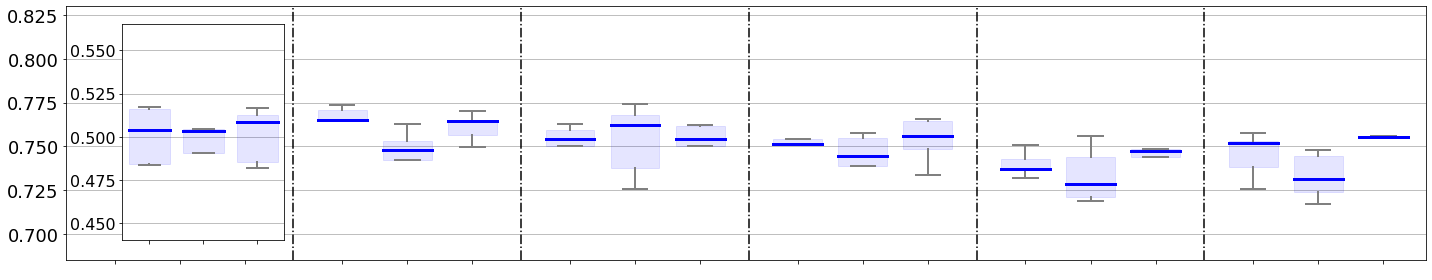

In [3]:
name_image = ["FE", "TCK", "DTW_D", "DTW_I"]

folders = ["Estadisticos/FE", "TCK", "DTW/D", "DTW/I"]

num_models_ML = 3
fig_merito = 3

for idx in range(len(folders)):
        
    fig, (ax1) = plt.subplots(1, 1, figsize=[20, 4])
    
    if folders[idx]=="Estadisticos/FE":
        left, bottom, width, height = [0.0875, 0.15, 0.1125, 0.75]
        ax3 = fig.add_axes([left, bottom, width, height])

    files = [folders[idx] + "/resultados_PCA_train.xlsx",
             folders[idx] + "/resultados_KPCA_train.xlsx",
             folders[idx] + "/resultados_AE_train.xlsx",
             folders[idx] + "/resultados_DAE_train.xlsx",
             folders[idx] + "/resultados_train_all.xlsx",
            "../Step1_kernels/resultados_kernels/"+folders[idx] + "/exponential_train.xlsx"]
             

    # clean the results, keeping only LR, RF and nuSVM.
    df_PCA = pd.read_excel(files[0]).drop(columns="Unnamed: 0")
    df_KPCA = pd.read_excel(files[1]).drop(columns="Unnamed: 0")
    df_AE  = pd.read_excel(files[2]).drop(columns="Unnamed: 0")
    df_DAE  = pd.read_excel(files[3]).drop(columns="Unnamed: 0")
    df_all  = pd.read_excel(files[4]).drop(columns="Unnamed: 0")
    df_kernel  = pd.read_excel(files[5]).drop(columns="Unnamed: 0")
    
            
    df_PCA = df_PCA.drop([df_PCA.index[9], df_PCA.index[10], df_PCA.index[11]]).reset_index(drop=True)
    df_KPCA = df_KPCA.drop([df_KPCA.index[3], df_KPCA.index[4], df_KPCA.index[5],
                           df_KPCA.index[9], df_KPCA.index[10], df_KPCA.index[11],
                           df_KPCA.index[15], df_KPCA.index[16], df_KPCA.index[17]]).reset_index(drop=True)
    df_AE = df_AE.drop([df_AE.index[9], df_AE.index[10], df_AE.index[11]]).reset_index(drop=True)
    df_DAE = df_DAE.drop([df_DAE.index[9], df_DAE.index[10], df_DAE.index[11]]).reset_index(drop=True)
    if folders[idx] != "DTW/I":
        df_all = df_all.drop([df_all.index[9], df_all.index[10], df_all.index[11]]).reset_index(drop=True)
    if folders[idx] == "TCK":
        df_all = df_kernel.copy()
    
    index = 0
    v_df = [df_kernel, df_all, df_PCA, df_KPCA, df_AE, df_DAE]
    space=0
    for i in range(len(v_df)):
        modelos_ML = 3
        df_aux = v_df[i]

        # ROC-AUC
        cont=2
        
        if i == 0 and folders[idx]=="Estadisticos/FE":
            box = ax3.boxplot(df_aux.loc[np.arange(cont, num_models_ML*fig_merito, fig_merito), :].values.T,
                              positions=np.arange(space+index*modelos_ML+0.75, space+index*modelos_ML+3.75, 1),
                              patch_artist=True,  widths=0.75,       
                              boxprops=dict(color="blue", alpha=0.1),
                              medianprops=dict(color="blue", alpha=1.0, linewidth=3),
                              whiskerprops=dict(linestyle='-', linewidth=2, color="gray"),
                              capprops=dict(linestyle='-', linewidth=2, color="gray"),
                              showfliers=False)
            
            ax3.set_ylim([0.44, 0.565])
            ax3.tick_params(axis='both', which='major', labelsize=16)
            ax3.grid(axis='y')
            ax3.set_xticklabels([])  

        else:
            box = ax1.boxplot(df_aux.loc[np.arange(cont, num_models_ML*fig_merito, fig_merito), :].values.T,
                              positions=np.arange(space+index*modelos_ML+0.75, space+index*modelos_ML+3.75, 1),
                              patch_artist=True,  widths=0.75,       
                              boxprops=dict(color="blue", alpha=0.1),
                              medianprops=dict(color="blue", alpha=1.0, linewidth=3),
                              whiskerprops=dict(linestyle='-', linewidth=2, color="gray"),
                              capprops=dict(linestyle='-', linewidth=2, color="gray"),
                              showfliers=False)
        
        box['boxes'][0].set_facecolor("blue")
        box['boxes'][1].set_facecolor("blue")
        box['boxes'][2].set_facecolor("blue")
        
        index+=1
        space+=0.5

    ax1.axvline(3.5, color="black", linestyle="dashdot")
    ax1.axvline(7, color="black", linestyle="dashdot")
    ax1.axvline(10.5, color="black", linestyle="dashdot")
    ax1.axvline(14, color="black", linestyle="dashdot")
    ax1.axvline(17.5, color="black", linestyle="dashdot")


    ax1.set_xlim(0, 22*0.95,24)
    ax1.set_xticks([0.75, 1.75, 2.75, 4.25, 5.25, 6.25, 7.75, 8.75, 9.75, 11.25, 12.25, 13.25, 14.75, 15.75, 16.75, 18.25, 19.25, 20.25])
    ax1.set_xticklabels([ 
                      ' ', ' ', ' ',
                      ' ', ' ', ' ',
                      ' ', ' ', ' ',
                      ' ', ' ', ' ',
                      ' ', ' ', ' ', 
                      ' ', ' ', ' '], fontsize=10, rotation=90)

    ax1.set_ylim([0.685, 0.83])
    ax1.tick_params(axis='both', which='major', labelsize=18)
    ax1.grid(axis='y')
    plt.tight_layout()
    
    plt.savefig("./Figures/" + name_image[idx] + "2.pdf")
    break



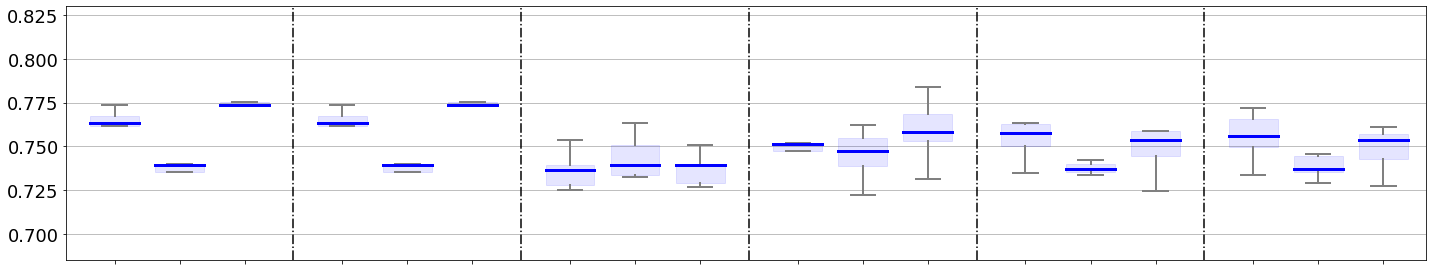

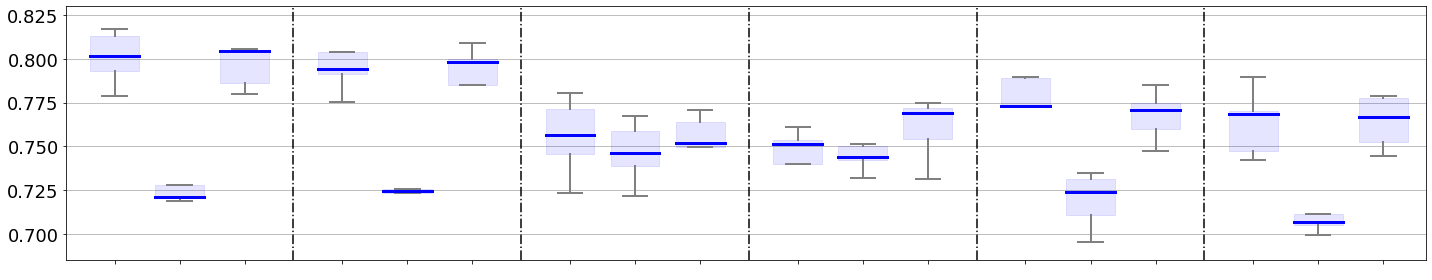

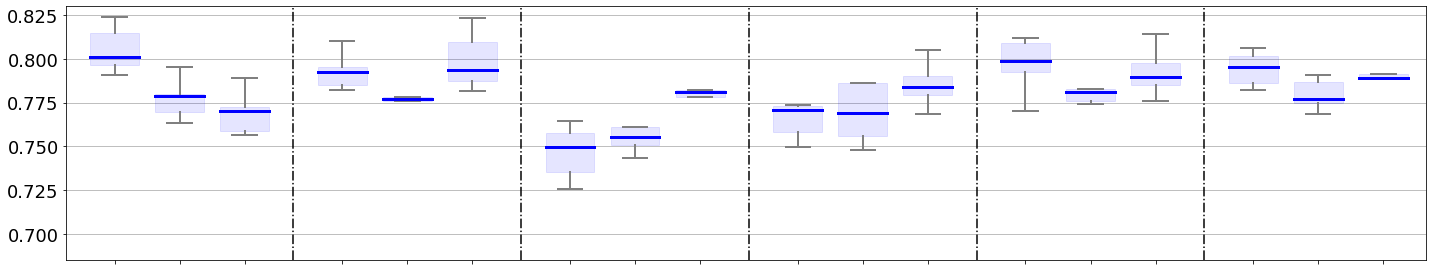

In [4]:
name_image = ["FE", "TCK", "DTW_D", "DTW_I"]

folders = ["Estadisticos/FE", "TCK", "DTW/D", "DTW/I"]

num_models_ML = 3
fig_merito = 3

for idx in range(len(folders)):
    
    if idx==0:
        continue
        
    fig, (ax1) = plt.subplots(1, 1, figsize=[20, 4])
    
    if folders[idx]=="Estadisticos/FE":
        left, bottom, width, height = [0.24, 0.35, 0.1125, 0.5]
        ax3 = fig.add_axes([left, bottom, width, height])

    files = [folders[idx] + "/resultados_PCA_train.xlsx",
             folders[idx] + "/resultados_KPCA_train.xlsx",
             folders[idx] + "/resultados_AE_train.xlsx",
             folders[idx] + "/resultados_DAE_train.xlsx",
             folders[idx] + "/resultados_train_all.xlsx",
            "../Step1_kernels/resultados_kernels/"+folders[idx] + "/exponential_train.xlsx"]
             

    # clean the results, keeping only LR, RF and nuSVM.
    df_PCA = pd.read_excel(files[0]).drop(columns="Unnamed: 0")
    df_KPCA = pd.read_excel(files[1]).drop(columns="Unnamed: 0")
    df_AE  = pd.read_excel(files[2]).drop(columns="Unnamed: 0")
    df_DAE  = pd.read_excel(files[3]).drop(columns="Unnamed: 0")
    df_all  = pd.read_excel(files[4]).drop(columns="Unnamed: 0")
    df_kernel  = pd.read_excel(files[5]).drop(columns="Unnamed: 0")
            
    df_PCA = df_PCA.drop([df_PCA.index[9], df_PCA.index[10], df_PCA.index[11]]).reset_index(drop=True)
    df_KPCA = df_KPCA.drop([df_KPCA.index[3], df_KPCA.index[4], df_KPCA.index[5],
                           df_KPCA.index[9], df_KPCA.index[10], df_KPCA.index[11],
                           df_KPCA.index[15], df_KPCA.index[16], df_KPCA.index[17]]).reset_index(drop=True)
    df_AE = df_AE.drop([df_AE.index[9], df_AE.index[10], df_AE.index[11]]).reset_index(drop=True)
    df_DAE = df_DAE.drop([df_DAE.index[9], df_DAE.index[10], df_DAE.index[11]]).reset_index(drop=True)
    
    if folders[idx] != "DTW/I":
        df_all = df_all.drop([df_all.index[9], df_all.index[10], df_all.index[11]]).reset_index(drop=True)
    if folders[idx] == "TCK":
        df_all = df_kernel.copy()
    
    index = 0
    v_df = [df_kernel, df_all, df_PCA, df_KPCA, df_AE, df_DAE]
    space=0
    for i in range(len(v_df)):
        modelos_ML = 3
        df_aux = v_df[i]
        # ROC-AUC
        cont=2
        if i == 1 and folders[idx]=="Estadisticos/FE":       
            box = ax3.boxplot(df_aux.loc[np.arange(cont, num_models_ML*fig_merito, fig_merito), :].values.T,
                              positions=np.arange(index*modelos_ML+1, index*modelos_ML+4, 1),
                              patch_artist=True,  widths=0.7,       
                              boxprops=dict(color="blue", alpha=0.1),
                              medianprops=dict(color="blue", alpha=1.0, linewidth=3),
                              whiskerprops=dict(linestyle='-', linewidth=2, color="gray"),
                              capprops=dict(linestyle='-', linewidth=2, color="gray"),
                              showfliers=False)
            
            ax3.set_ylim([0.48, 0.525])
            ax3.tick_params(axis='both', which='major', labelsize=16)
            ax3.grid(axis='y')
            ax3.set(xticklabels=[])  

        else:
            box = plt.boxplot(df_aux.loc[np.arange(cont, num_models_ML*fig_merito, fig_merito), :].values.T,
                              positions=np.arange(space+index*modelos_ML+0.75, space+index*modelos_ML+3.75, 1),
                              patch_artist=True,  widths=0.75,       
                              boxprops=dict(color="blue", alpha=0.1),
                              medianprops=dict(color="blue", alpha=1.0, linewidth=3),
                              whiskerprops=dict(linestyle='-', linewidth=2, color="gray"),
                              capprops=dict(linestyle='-', linewidth=2, color="gray"),
                              showfliers=False)
        
        box['boxes'][0].set_facecolor("blue")
        box['boxes'][1].set_facecolor("blue")
        box['boxes'][2].set_facecolor("blue")
        
        index+=1
        space+=0.5

    plt.axvline(3.5, color="black", linestyle="dashdot")
    plt.axvline(7, color="black", linestyle="dashdot")
    plt.axvline(10.5, color="black", linestyle="dashdot")
    plt.axvline(14, color="black", linestyle="dashdot")
    plt.axvline(17.5, color="black", linestyle="dashdot")


    plt.xlim(0, 22*0.95,24)
    ax1.set_xticks([0.75, 1.75, 2.75, 4.25, 5.25, 6.25, 7.75, 8.75, 9.75, 11.25, 12.25, 13.25, 14.75, 15.75, 16.75, 18.25, 19.25, 20.25])
    ax1.set_xticklabels([ 
                      ' ', ' ', ' ',
                      ' ', ' ', ' ',
                      ' ', ' ', ' ',
                      ' ', ' ', ' ',
                      ' ', ' ', ' ', 
                      ' ', ' ', ' '], fontsize=10, rotation=90)

    ax1.set_ylim([0.685, 0.83])
    ax1.tick_params(axis='both', which='major', labelsize=18)
    ax1.grid(axis='y')
    plt.tight_layout()
    plt.savefig("./Figures/" + name_image[idx] + ".pdf")

### NOTE: The figures are finally edited in power point, version included in the paper. 